In [6]:
import collections
import matplotlib.pyplot as plt

%matplotlib inline

In [1]:
treebanks = ["tiger", "negra", "dptb"]
parsers = ["3", "4", "5", "5_wn", "6", "6_wn"]

In [15]:
timings = {k: collections.defaultdict(lambda: list()) for k in parsers}
           
for key in parsers:
    for t in treebanks:
        with open("%s/pred_%s.timing" % (t, key), "r") as f:
            for l in f:
                l = l.strip().split()
                timings[key][int(l[0])].append(float(l[1]))

In [30]:
def plot_values(parser_v):
    v = {k: sum(v) / len(v) for k, v in parser_v.items()}
    x, y = zip(*sorted(v.items(), key=lambda x: x[0]))
    return x, y

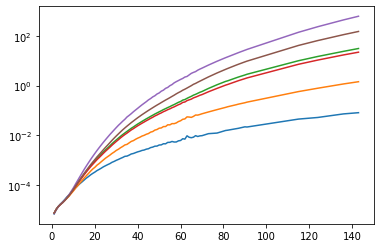

In [31]:
plt.yscale("log")
for parser_v in timings.values():
    x, y = plot_values(parser_v)
    plt.plot(x, y)

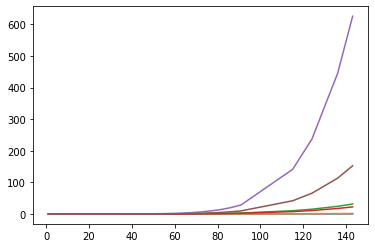

In [32]:
plt.yscale("linear")
for parser_v in timings.values():
    x, y = plot_values(parser_v)
    plt.plot(x, y)

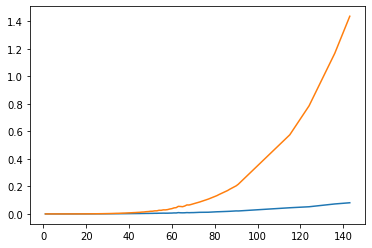

In [33]:
plt.yscale("linear")
for k in ["3", "4"]:
    x, y = plot_values(timings[k])
    plt.plot(x, y)

In [37]:
for k in ["3", "4"]:
    x, y = plot_values(timings[k])
    with open("pts_%s" % k, "w") as f:
        f.write("x,y\n")
        for x, y in zip(x, y):
            f.write("%f,%f\n" % (x, y))